DATA SCIENCE PROJECT (SURVIVAL PREDICTION USING LOGISTIC REGRESSION ~ TITANIC DATASET)

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn

In [11]:
data=pd.read_csv("/Users/varun/Downloads/Titanic-Dataset.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#Total no of passengers in original data"
print(len(data))

891


DATA ANALYSIS

<AxesSubplot:xlabel='Survived', ylabel='count'>

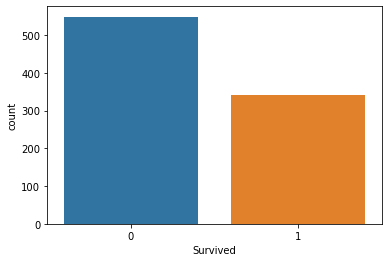

In [13]:
sns.countplot(x="Survived", data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

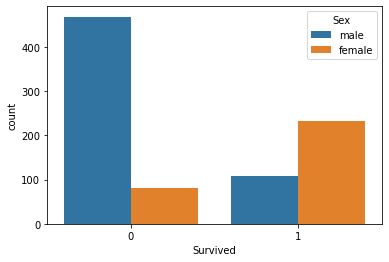

In [14]:
sns.countplot(x="Survived",hue="Sex",data=data)

<AxesSubplot:ylabel='Frequency'>

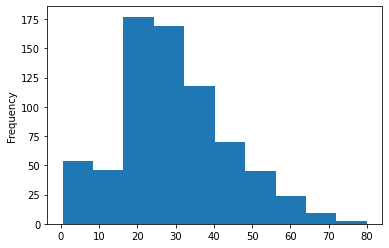

In [15]:
data["Age"].plot.hist()

In [16]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


DATA CLEANING

In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

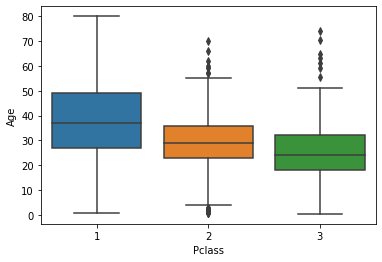

In [18]:
#Noticed that Age, Embarked and Cabin has null values
sns.boxplot(x="Pclass",y="Age",data=data)

In [19]:
data.drop("Cabin",axis=1,inplace=True)

In [20]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
#Cabin is removed

In [22]:
data.dropna(inplace=True)

In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
Sex=pd.get_dummies(data['Sex'],drop_first=True)
Sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
Embarked=pd.get_dummies(data['Embarked'],drop_first=True)
Embarked.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
Pclass=pd.get_dummies(data['Pclass'],drop_first=True)
Pclass.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [27]:
data=pd.concat([data,Sex,Embarked,Pclass],axis=1)

In [28]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [29]:
data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [30]:
data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [31]:
data.drop(['Pclass'],axis=1,inplace=True)

In [32]:
data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


TRAIN DATA

In [33]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
from sklearn.linear_model import LogisticRegression

In [60]:
lm=LogisticRegression(solver='liblinear',max_iter=100)

In [62]:
lm.fit(X_train.values, y_train.values)

LogisticRegression(solver='liblinear')

In [64]:
p=lm.predict(X_test.values)

In [65]:
from sklearn.metrics import classification_report

In [68]:
classification_report(y_test.values,p)

'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       126\n           1       0.75      0.72      0.73        88\n\n    accuracy                           0.79       214\n   macro avg       0.78      0.77      0.78       214\nweighted avg       0.78      0.79      0.78       214\n'

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_test.values,p)

array([[105,  21],
       [ 25,  63]])

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test.values,p)

0.7850467289719626